In [1]:
!wget --no-clobber ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz

--2016-11-02 23:06:11--  ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz
           => 'Homo_sapiens.GRCh38.85.gff3.gz'
Resolving ftp.ensembl.org... 193.62.203.85
Connecting to ftp.ensembl.org|193.62.203.85|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-85/gff3/homo_sapiens ... done.
==> SIZE Homo_sapiens.GRCh38.85.gff3.gz ... 38469475
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.85.gff3.gz ... done.
Length: 38469475 (37M) (unauthoritative)

Homo_sapiens.GRCh38 100%[=====================>]  36.69M   246KB/s   in 2m 37s 

2016-11-02 23:08:52 (240 KB/s) - 'Homo_sapiens.GRCh38.85.gff3.gz' saved [38469475]



In [2]:
import time, os, json

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
df = pd.read_csv('Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                  sep='\t', comment='#', low_memory=False,
                  header=None, names=col_names)

In [4]:
df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11"
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601849 entries, 0 to 2601848
Data columns (total 9 columns):
seqid         object
source        object
type          object
start         int64
end           int64
score         object
strand        object
phase         object
attributes    object
dtypes: int64(2), object(7)
memory usage: 178.7+ MB


In [6]:
df.seqid.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000008.2', 'GL000009.2', 'GL000194.1', 'GL000195.1',
       'GL000205.2', 'GL000208.1', 'GL000213.1', 'GL000214.1',
       'GL000216.2', 'GL000218.1', 'GL000219.1', 'GL000220.1',
       'GL000221.1', 'GL000224.1', 'GL000225.1', 'GL000226.1',
       'KI270302.1', 'KI270303.1', 'KI270304.1', 'KI270305.1',
       'KI270310.1', 'KI270311.1', 'KI270312.1', 'KI270315.1',
       'KI270316.1', 'KI270317.1', 'KI270320.1', 'KI270322.1',
       'KI270329.1', 'KI270330.1', 'KI270333.1', 'KI270334.1',
       'KI270335.1', 'KI270336.1', 'KI270337.1', 'KI270338.1',
       'KI270340.1', 'KI270362.1', 'KI270363.1', 'KI270364.1',
       'KI270366.1', 'KI270371.1', 'KI270372.1', 'KI270373.1',
       'KI270374.1', 'KI270375.1', 'KI270376.1', 'KI270378.1',
       'KI270379.1', 'KI270381.1', 'KI270382.1', 'KI270383.1',
       'KI270384.1', 'KI270385.1', 'KI270386

In [7]:
df.seqid.unique().shape

(194,)

### How much of the genome is incomplete

In [8]:
gdf = df[df.source == 'GRCh38']
gdf.shape

(194, 9)

In [9]:
gdf.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes
2511575,KI270588.1,GRCh38,supercontig,1,6158,.,.,.,"ID=supercontig:KI270588.1;Alias=chrUn_KI270588v1,NT_187455.1"
2512136,KI270713.1,GRCh38,supercontig,1,40745,.,.,.,"ID=supercontig:KI270713.1;Alias=chr1_KI270713v1_random,NT_187368.1"
2513998,KI270757.1,GRCh38,supercontig,1,71251,.,.,.,"ID=supercontig:KI270757.1;Alias=chrUn_KI270757v1,NT_187512.1"
2511559,KI270522.1,GRCh38,supercontig,1,5674,.,.,.,"ID=supercontig:KI270522.1;Alias=chrUn_KI270522v1,NT_187434.1"
2511576,KI270589.1,GRCh38,supercontig,1,44474,.,.,.,"ID=supercontig:KI270589.1;Alias=chrUn_KI270589v1,NT_187451.1"
2511560,KI270528.1,GRCh38,supercontig,1,2983,.,.,.,"ID=supercontig:KI270528.1;Alias=chrUn_KI270528v1,NT_187440.1"
2513046,KI270731.1,GRCh38,supercontig,1,150754,.,.,.,"ID=supercontig:KI270731.1;Alias=chr22_KI270731v1_random,NT_187386.1"
2513716,KI270742.1,GRCh38,supercontig,1,186739,.,.,.,"ID=supercontig:KI270742.1;Alias=chrUn_KI270742v1,NT_187513.1"
674767,14,GRCh38,chromosome,1,107043718,.,.,.,"ID=chromosome:14;Alias=CM000676.2,chr14,NC_000014.9"
2080148,6,GRCh38,chromosome,1,170805979,.,.,.,"ID=chromosome:6;Alias=CM000668.2,chr6,NC_000006.12"


In [10]:
gdf = gdf.copy()
gdf['length'] = gdf.end - gdf.start + 1
gdf.head()

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11",248956422
235068,10,GRCh38,chromosome,1,133797422,.,.,.,"ID=chromosome:10;Alias=CM000672.2,chr10,NC_000010.11",133797422
328938,11,GRCh38,chromosome,1,135086622,.,.,.,"ID=chromosome:11;Alias=CM000673.2,chr11,NC_000011.10",135086622
483370,12,GRCh38,chromosome,1,133275309,.,.,.,"ID=chromosome:12;Alias=CM000674.2,chr12,NC_000012.12",133275309
634486,13,GRCh38,chromosome,1,114364328,.,.,.,"ID=chromosome:13;Alias=CM000675.2,chr13,NC_000013.11",114364328


In [11]:
gdf.length.sum()

3096629726

In [12]:
chrs = [str(_) for _ in range(1, 23)] + ['X', 'Y', 'MT']
gdf[-gdf.seqid.isin(chrs)].length.sum() / gdf.length.sum()

0.0037021917421198327

In [13]:
gdf[gdf['type'] == 'supercontig'].length.sum() / gdf.length.sum()

0.0037021917421198327

### How many genes are there

In [14]:
edf = df[df.source.isin(['ensembl', 'havana', 'ensembl_havana'])]
edf.sample(10)

,seqid,source,type,start,end,score,strand,phase,attributes
781228,15,ensembl_havana,exon,35542413,35542507,.,-,.,Parent=transcript:ENST00000440392;Name=ENSE00003521726;constitutive=0;ensembl_end_phase=1;ensembl_phase=2;exon_id=ENSE00003521726;rank=2;version=1
530673,12,havana,exon,47846335,47846451,.,-,.,Parent=transcript:ENST00000547065;Name=ENSE00003542191;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00003542191;rank=8;version=1
2081115,6,havana,exon,2785007,2785745,.,+,.,Parent=transcript:ENST00000380771;Name=ENSE00001486198;constitutive=0;ensembl_end_phase=-1;ensembl_phase=0;exon_id=ENSE00001486198;rank=7;version=1
1588614,20,ensembl_havana,CDS,37203885,37203960,.,+,1,ID=CDS:ENSP00000237530;Parent=transcript:ENST00000237530;protein_id=ENSP00000237530
2555801,X,ensembl_havana,aberrant_processed_transcript,77856460,77895424,.,-,.,ID=transcript:ENST00000476168;Parent=gene:ENSG00000102158;Name=MAGT1-003;biotype=retained_intron;havana_transcript=OTTHUMT00000057303;havana_version=3;transcript_id=ENST00000476168;transcript_support_level=2;version=1
2441625,9,havana,CDS,41906854,41906987,.,-,2,ID=CDS:ENSP00000483642;Parent=transcript:ENST00000476961;protein_id=ENSP00000483642
1728170,3,havana,exon,32570346,32570419,.,-,.,Parent=transcript:ENST00000424991;Name=ENSE00003565423;constitutive=0;ensembl_end_phase=1;ensembl_phase=2;exon_id=ENSE00003565423;rank=2;version=1
1546921,2,ensembl_havana,exon,233767034,233767165,.,+,.,Parent=transcript:ENST00000373450;Name=ENSE00003711331;constitutive=1;ensembl_end_phase=0;ensembl_phase=0;exon_id=ENSE00003711331;rank=2;version=1
1546405,2,ensembl_havana,exon,233434769,233434901,.,+,.,Parent=transcript:ENST00000409813;Name=ENSE00003552222;constitutive=0;ensembl_end_phase=1;ensembl_phase=0;exon_id=ENSE00003552222;rank=4;version=1
862704,15,havana,exon,100053897,100054054,.,-,.,Parent=transcript:ENST00000568565;Name=ENSE00001124086;constitutive=0;ensembl_end_phase=0;ensembl_phase=1;exon_id=ENSE00001124086;rank=4;version=1


In [15]:
edf.type.value_counts()

exon                             1180596
CDS                              704604 
five_prime_UTR                   142387 
three_prime_UTR                  133938 
transcript                       96375  
gene                             42470  
processed_transcript             28228  
aberrant_processed_transcript    26944  
NMD_transcript_variant           13761  
lincRNA                          13247  
processed_pseudogene             10722  
lincRNA_gene                     7533   
pseudogene                       3049   
RNA                              2221   
snRNA                            1909   
snRNA_gene                       1909   
snoRNA                           956    
snoRNA_gene                      944    
pseudogenic_transcript           737    
rRNA                             549    
rRNA_gene                        549    
miRNA                            302    
V_gene_segment                   216    
J_gene_segment                   158    
VD_gene_segment 

In [16]:
ndf = edf[edf.type == 'gene']
ndf = ndf.copy()
ndf.sample(10).attributes.values

array([ 'ID=gene:ENSG00000166923;Name=GREM1;biotype=protein_coding;description=gremlin 1%2C DAN family BMP antagonist [Source:HGNC Symbol%3BAcc:HGNC:2001];gene_id=ENSG00000166923;havana_gene=OTTHUMG00000129319;havana_version=4;logic_name=ensembl_havana_gene;version=10',
       'ID=gene:ENSG00000104679;Name=R3HCC1;biotype=protein_coding;description=R3H domain and coiled-coil containing 1 [Source:HGNC Symbol%3BAcc:HGNC:27329];gene_id=ENSG00000104679;havana_gene=OTTHUMG00000163786;havana_version=3;logic_name=ensembl_havana_gene;version=10',
       'ID=gene:ENSG00000266988;Name=RP11-749H17.1;biotype=sense_intronic;gene_id=ENSG00000266988;havana_gene=OTTHUMG00000179041;havana_version=1;logic_name=havana;version=5',
       'ID=gene:ENSG00000130300;Name=PLVAP;biotype=protein_coding;description=plasmalemma vesicle associated protein [Source:HGNC Symbol%3BAcc:HGNC:13635];gene_id=ENSG00000130300;havana_gene=OTTHUMG00000182784;havana_version=2;logic_name=ensembl_havana_gene;version=8',
       'ID

In [17]:
import re

RE_GENE_NAME = re.compile(r'Name=(?P<gene_name>.+?);')
def extract_gene_name(attributes_str):
    res = RE_GENE_NAME.search(attributes_str)
    return res.group('gene_name')

ndf['gene_name'] = ndf.attributes.apply(extract_gene_name)

In [18]:
RE_GENE_ID = re.compile(r'gene_id=(?P<gene_id>ENSG.+?);')
def extract_gene_id(attributes_str):
    res = RE_GENE_ID.search(attributes_str)
    return res.group('gene_id')

ndf['gene_id'] = ndf.attributes.apply(extract_gene_id)

RE_DESC = re.compile('description=(?P<desc>.+?);')
def extract_description(attributes_str):
    res = RE_DESC.search(attributes_str)
    if res is None:
        return ''
    else:
        return res.group('desc')

ndf['desc'] = ndf.attributes.apply(extract_description)

In [19]:
ndf.drop('attributes', axis=1, inplace=True)
ndf.head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc
16,1,havana,gene,11869,14409,.,+,.,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Symbol%3BAcc:HGNC:37102]
28,1,havana,gene,14404,29570,.,-,.,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38034]
71,1,havana,gene,52473,53312,.,+,.,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member 4 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:14822]
74,1,havana,gene,62948,63887,.,+,.,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member 11 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:31276]
77,1,ensembl_havana,gene,69091,70008,.,+,.,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member 5 [Source:HGNC Symbol%3BAcc:HGNC:14825]


In [20]:
ndf.shape

(42470, 11)

In [21]:
ndf.gene_id.unique().shape

(42470,)

In [22]:
ndf.gene_name.unique().shape

(42387,)

In [23]:
count_df = ndf.groupby('gene_name').count().ix[:, 0].sort_values().ix[::-1]

In [24]:
count_df.head(10)

gene_name
SCARNA20           7
SCARNA16           6
SCARNA17           5
SCARNA15           4
SCARNA21           4
SCARNA11           4
Clostridiales-1    3
SCARNA4            3
C1QTNF9B-AS1       2
C11orf71           2
Name: seqid, dtype: int64

In [25]:
count_df[count_df > 1].shape

(63,)

In [26]:
count_df.shape

(42387,)

In [27]:
count_df[count_df > 1].shape[0] / count_df.shape[0]

0.0014863047632528842

In [28]:
ndf[ndf.gene_name == 'SCARNA20']

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc
179399,1,ensembl,gene,171768070,171768175,.,+,.,SCARNA20,ENSG00000253060,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
201037,1,ensembl,gene,204727991,204728106,.,+,.,SCARNA20,ENSG00000251861,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
349203,11,ensembl,gene,8555016,8555146,.,+,.,SCARNA20,ENSG00000252778,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
718520,14,ensembl,gene,63479272,63479413,.,+,.,SCARNA20,ENSG00000252800,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
837233,15,ensembl,gene,75121536,75121666,.,-,.,SCARNA20,ENSG00000252722,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
1039874,17,ensembl,gene,28018770,28018907,.,+,.,SCARNA20,ENSG00000251818,Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]
1108215,17,ensembl,gene,60231516,60231646,.,-,.,SCARNA20,ENSG00000252577,small Cajal body-specific RNA 20 [Source:HGNC Symbol%3BAcc:HGNC:32578]


### How long is a typical gene

In [29]:
ndf['length'] = ndf.end - ndf.start + 1
ndf.length.describe()

count    4.247000e+04
mean     3.583348e+04
std      9.683485e+04
min      8.000000e+00
25%      8.840000e+02
50%      5.170500e+03
75%      3.055200e+04
max      2.304997e+06
Name: length, dtype: float64

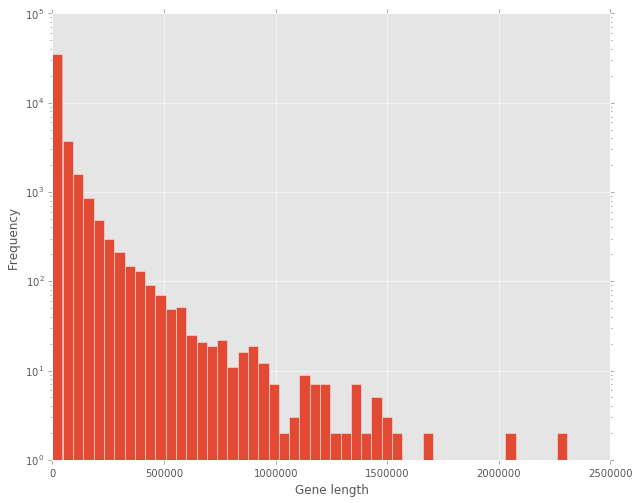

In [30]:
import matplotlib as plt

ax = ndf.length.plot(kind='hist', bins=50, logy=True)
ax.set_xlabel("Gene length")

In [31]:
ndf[ndf.length > 2e6].sort_values('length').ix[::-1]

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc,length
2309345,7,ensembl_havana,gene,146116002,148420998,.,+,.,CNTNAP2,ENSG00000174469,contactin associated protein-like 2 [Source:HGNC Symbol%3BAcc:HGNC:13830],2304997
2422510,9,ensembl_havana,gene,8314246,10612723,.,-,.,PTPRD,ENSG00000153707,protein tyrosine phosphatase%2C receptor type D [Source:HGNC Symbol%3BAcc:HGNC:9668],2298478
2527169,X,ensembl_havana,gene,31097677,33339441,.,-,.,DMD,ENSG00000198947,dystrophin [Source:HGNC Symbol%3BAcc:HGNC:2928],2241765
440886,11,ensembl_havana,gene,83455012,85627922,.,-,.,DLG2,ENSG00000150672,discs large MAGUK scaffold protein 2 [Source:HGNC Symbol%3BAcc:HGNC:2901],2172911
2323457,8,ensembl_havana,gene,2935353,4994972,.,-,.,CSMD1,ENSG00000183117,CUB and Sushi multiple domains 1 [Source:HGNC Symbol%3BAcc:HGNC:14026],2059620
1569914,20,ensembl_havana,gene,13995369,16053197,.,+,.,MACROD2,ENSG00000172264,MACRO domain containing 2 [Source:HGNC Symbol%3BAcc:HGNC:16126],2057829


In [32]:
ndf.sort_values('length').head()

,seqid,source,type,start,end,score,strand,phase,gene_name,gene_id,desc,length
682278,14,havana,gene,22438547,22438554,.,+,.,TRDD1,ENSG00000223997,T cell receptor delta diversity 1 [Source:HGNC Symbol%3BAcc:HGNC:12254],8
682282,14,havana,gene,22439007,22439015,.,+,.,TRDD2,ENSG00000237235,T cell receptor delta diversity 2 [Source:HGNC Symbol%3BAcc:HGNC:12255],9
2306836,7,havana,gene,142786213,142786224,.,+,.,TRBD1,ENSG00000282431,T cell receptor beta diversity 1 [Source:HGNC Symbol%3BAcc:HGNC:12158],12
682286,14,havana,gene,22449113,22449125,.,+,.,TRDD3,ENSG00000228985,T cell receptor delta diversity 3 [Source:HGNC Symbol%3BAcc:HGNC:12256],13
1879625,4,havana,gene,10238213,10238235,.,-,.,AC006499.9,ENSG00000271544,,23


### Gene distributions among chromosomes

In [33]:
ndf = ndf[ndf.seqid.isin(chrs)]
chr_gene_counts = ndf.groupby('seqid').count().ix[:, 0].sort_values().ix[::-1]
chr_gene_counts

seqid
1     3902
2     2806
11    2561
19    2412
17    2280
3     2204
6     2154
12    2140
7     2106
5     2002
16    1881
X     1852
4     1751
9     1659
8     1628
10    1600
15    1476
14    1449
22    996 
20    965 
13    872 
18    766 
21    541 
Y     436 
Name: source, dtype: int64

In [34]:
gdf = gdf[gdf.seqid.isin(chrs)]
gdf.drop(['start', 'end', 'score', 'strand', 'phase', 'attributes'],
         axis=1, inplace=True)
gdf.sort_values('length').ix[::-1]

,seqid,source,type,length
0,1,GRCh38,chromosome,248956422
1364641,2,GRCh38,chromosome,242193529
1705855,3,GRCh38,chromosome,198295559
1864567,4,GRCh38,chromosome,190214555
1964921,5,GRCh38,chromosome,181538259
2080148,6,GRCh38,chromosome,170805979
2196981,7,GRCh38,chromosome,159345973
2514125,X,GRCh38,chromosome,156040895
2321361,8,GRCh38,chromosome,145138636
2416560,9,GRCh38,chromosome,138394717


In [35]:
cdf = chr_gene_counts.to_frame(name='gene_count').reset_index()
cdf.head(2)

,seqid,gene_count
0,1,3902
1,2,2806


In [36]:
merged = gdf.merge(cdf, on='seqid')
merged

,seqid,source,type,length,gene_count
0,1,GRCh38,chromosome,248956422,3902
1,10,GRCh38,chromosome,133797422,1600
2,11,GRCh38,chromosome,135086622,2561
3,12,GRCh38,chromosome,133275309,2140
4,13,GRCh38,chromosome,114364328,872
5,14,GRCh38,chromosome,107043718,1449
6,15,GRCh38,chromosome,101991189,1476
7,16,GRCh38,chromosome,90338345,1881
8,17,GRCh38,chromosome,83257441,2280
9,18,GRCh38,chromosome,80373285,766


In [37]:
df[(df.type == 'gene') & (df.seqid == 'MT')]

,seqid,source,type,start,end,score,strand,phase,attributes
2514003,MT,insdc,gene,648,1601,.,+,.,ID=gene:ENSG00000211459;Name=MT-RNR1;biotype=Mt_rRNA;description=mitochondrially encoded 12S RNA [Source:HGNC Symbol%3BAcc:HGNC:7470];gene_id=ENSG00000211459;logic_name=mt_genbank_import;version=2
2514009,MT,insdc,gene,1671,3229,.,+,.,ID=gene:ENSG00000210082;Name=MT-RNR2;biotype=Mt_rRNA;description=mitochondrially encoded 16S RNA [Source:HGNC Symbol%3BAcc:HGNC:7471];gene_id=ENSG00000210082;logic_name=mt_genbank_import;version=2
2514016,MT,insdc,gene,3307,4262,.,+,.,ID=gene:ENSG00000198888;Name=MT-ND1;biotype=protein_coding;description=mitochondrially encoded NADH:ubiquinone oxidoreductase core subunit 1 [Source:HGNC Symbol%3BAcc:HGNC:7455];gene_id=ENSG00000198888;logic_name=mt_genbank_import;version=2
2514029,MT,insdc,gene,4470,5511,.,+,.,ID=gene:ENSG00000198763;Name=MT-ND2;biotype=protein_coding;description=mitochondrially encoded NADH:ubiquinone oxidoreductase core subunit 2 [Source:HGNC Symbol%3BAcc:HGNC:7456];gene_id=ENSG00000198763;logic_name=mt_genbank_import;version=3
2514048,MT,insdc,gene,5904,7445,.,+,.,ID=gene:ENSG00000198804;Name=MT-CO1;biotype=protein_coding;description=mitochondrially encoded cytochrome c oxidase I [Source:HGNC Symbol%3BAcc:HGNC:7419];gene_id=ENSG00000198804;logic_name=mt_genbank_import;version=2
2514058,MT,insdc,gene,7586,8269,.,+,.,ID=gene:ENSG00000198712;Name=MT-CO2;biotype=protein_coding;description=mitochondrially encoded cytochrome c oxidase II [Source:HGNC Symbol%3BAcc:HGNC:7421];gene_id=ENSG00000198712;logic_name=mt_genbank_import;version=1
2514065,MT,insdc,gene,8366,8572,.,+,.,ID=gene:ENSG00000228253;Name=MT-ATP8;biotype=protein_coding;description=mitochondrially encoded ATP synthase 8 [Source:HGNC Symbol%3BAcc:HGNC:7415];gene_id=ENSG00000228253;logic_name=mt_genbank_import;version=1
2514069,MT,insdc,gene,8527,9207,.,+,.,ID=gene:ENSG00000198899;Name=MT-ATP6;biotype=protein_coding;description=mitochondrially encoded ATP synthase 6 [Source:HGNC Symbol%3BAcc:HGNC:7414];gene_id=ENSG00000198899;logic_name=mt_genbank_import;version=2
2514073,MT,insdc,gene,9207,9990,.,+,.,ID=gene:ENSG00000198938;Name=MT-CO3;biotype=protein_coding;description=mitochondrially encoded cytochrome c oxidase III [Source:HGNC Symbol%3BAcc:HGNC:7422];gene_id=ENSG00000198938;logic_name=mt_genbank_import;version=2
2514080,MT,insdc,gene,10059,10404,.,+,.,ID=gene:ENSG00000198840;Name=MT-ND3;biotype=protein_coding;description=mitochondrially encoded NADH:ubiquinone oxidoreductase core subunit 3 [Source:HGNC Symbol%3BAcc:HGNC:7458];gene_id=ENSG00000198840;logic_name=mt_genbank_import;version=2


In [38]:
merged[['length', 'gene_count']].corr()

,length,gene_count
length,1.000000,0.728221
gene_count,0.728221,1.000000


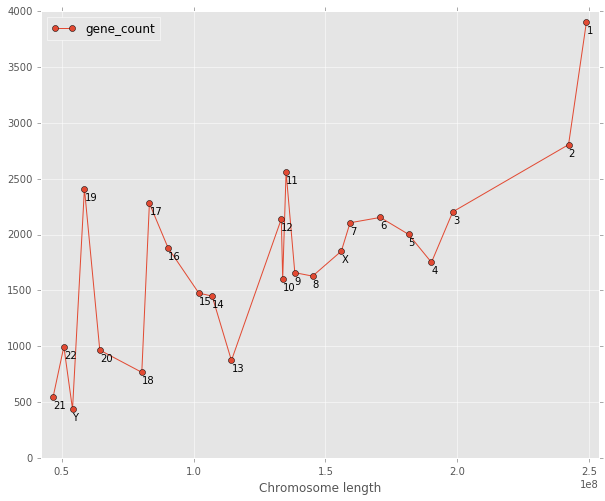

In [39]:
ax = merged[['length', 'gene_count']].sort_values('length').plot(x='length', y='gene_count', style='o-')
# add some margin to both ends of x axis
xlim = ax.get_xlim()
margin = xlim[0] * 0.1
ax.set_xlim([xlim[0] - margin, xlim[1] + margin])
# Label each point on the graph
for (s, x, y) in merged[['seqid', 'length', 'gene_count']].sort_values('length').values:
    ax.text(x, y - 100, str(s))
ax.set_xlabel('Chromosome length')